# Explore here

In [2]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

ds= pd.read_csv("/workspaces/Finarosalina_proyecto_EDA/data/raw/AB_NYC_2019.csv")


In [3]:
ds.info()  # revisamos numero de filas y columnas y valores nulos y tipología de forma general


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
# revisar si hay valores repetidos. No hay por ID :np.int64(0)
ds.drop("host_id", axis = 1).duplicated().sum()

# eliminar col que no aportan valor  host_name ya que no es el nombre completo, ademas hay nombres repetidos sin relación.
ds.drop(["host_name"], axis = 1, inplace = True) 

filtered_name = ds.groupby("name")["minimum_nights"].mean()  # para asegurarme antes he filtrado por host name y ahora por name para ver valores repetidos

# Verificar si alguna columna tiene el signo de dólar
for col in ds.columns:
    if ds[col].dtype == 'object':
        if ds[col].str.contains('\$', regex=True).any():
            print(f"El signo de dólar '$' está presente en la columna: {col}")
# Eliminar el signo de dólar en la columna 'name'
ds['name'] = ds['name'].str.replace(r'\$', '', regex=True)

import re

# Función para detectar caracteres no alfanuméricos. Ya que estamos revisamos que no haya más simbolos raros que distorsionen
def detectar_caracteres_raros(columna):
    return columna.str.contains(r'[^a-zA-Z0-9\s]', regex=True)

# Revisar en todas las columnas de tipo texto
for col in ds.columns:
    if ds[col].dtype == 'object':  # Solo en columnas de texto
        if ds[col].str.contains(r'[^a-zA-Z0-9\s]', regex=True).any():
            print(f"Símbolos raros encontrados en la columna: {col}")

ds.shape
ds.head()

El signo de dólar '$' está presente en la columna: name
Símbolos raros encontrados en la columna: name
Símbolos raros encontrados en la columna: neighbourhood
Símbolos raros encontrados en la columna: room_type
Símbolos raros encontrados en la columna: last_review


,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


variables categoricas = 'name', 'neighbourhood_group', 'neighbourhood', 'room_type'    
El atributo nombre no tiene sentido representarlo porque sólo aparece una vez cada establecimiento 

/tmp/ipykernel_627/1399035650.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Neighbourhood Groups', loc='upper right')


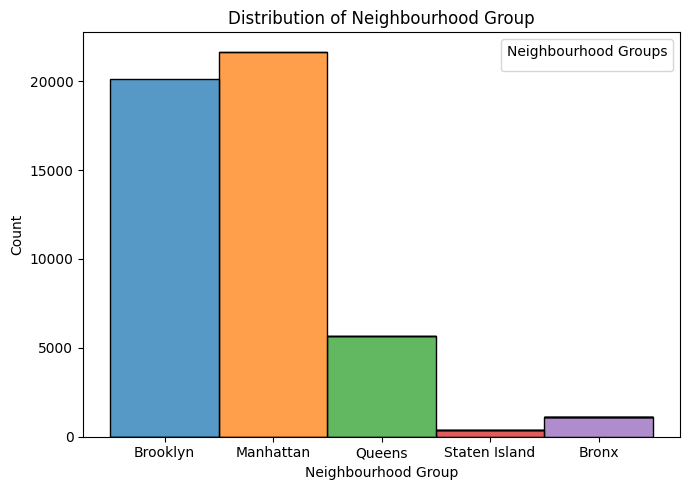

/home/vscode/.local/lib/python3.11/site-packages/seaborn/distributions.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)
/tmp/ipykernel_627/1399035650.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Neighbourhood', loc='upper right')  # Adjust legend position if needed


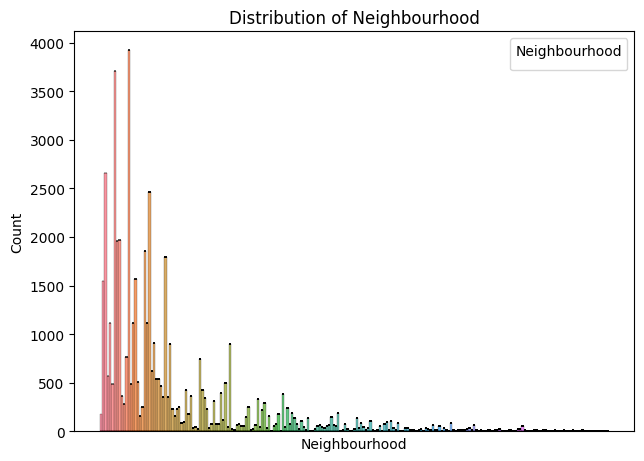

In [5]:

plt.figure(figsize=(7, 5))  # Necesito ver mejor las categóricas para que no se superpongan valores
sns.histplot(data=ds, x="neighbourhood_group", hue="neighbourhood_group", multiple="stack", legend=True)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Distribution of Neighbourhood Group')
plt.legend(title='Neighbourhood Groups', loc='upper right') 
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))  # Necesito ver mejor las categóricas para que no se superpongan valores
sns.histplot(data=ds, x="neighbourhood", hue="neighbourhood", multiple="stack", legend=True)
plt.xticks([])
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Distribution of Neighbourhood')
plt.legend(title='Neighbourhood', loc='upper right')  # Adjust legend position if needed
# Ajuste manual de los márgenes
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()




La distribicion muestral no es normal, hay zonas como Brooklin y Manhattan que cuentan con muchos mas registros que el resto. Neighbourhood, la mayor parte de valores está concentrada en una zona pequeña y el resto apenas es significativo.


In [7]:
import pandas as pd

# Seleccionamos una muestra aleatoria de 1000 filas
ds_sample = ds.sample(1000, random_state=42)

# Función de limpieza de texto
def clean_text(text):
    text = text.strip().lower()  # Convertir a minúsculas y eliminar espacios extra
    text = ''.join(e for e in text if e.isalnum() or e.isspace())  # Eliminar caracteres no alfabéticos (excepto espacio)
    return text

# Limpiar la columna 'name'  como me extraña que solo aparezca una vez cada alojamiento: ds_sample['clean_name'] = ds_sample['name'].apply(clean_text)

# Verificar si hay nombres duplicados después de la limpieza: duplicates = ds_sample[ds_sample.duplicated(subset='clean_name', keep=False)]

# Mostrar cuántos duplicados encontramos y algunos de ellos: print(f'Número de nombres duplicados (después de limpieza): {duplicates.shape[0]}')
#print(duplicates[['name', 'clean_name']].head(10))

# Si bien la columna  está limpia, el nombre del establecimiento no aporta para trabajar con él, y se puede recuperar con el ID HOST, si se quiere 
#obtener conclusiones de algún alojamiento concreto
ds_limpio = ds.drop(["name"], axis=1)

print(ds_limpio.columns)


Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


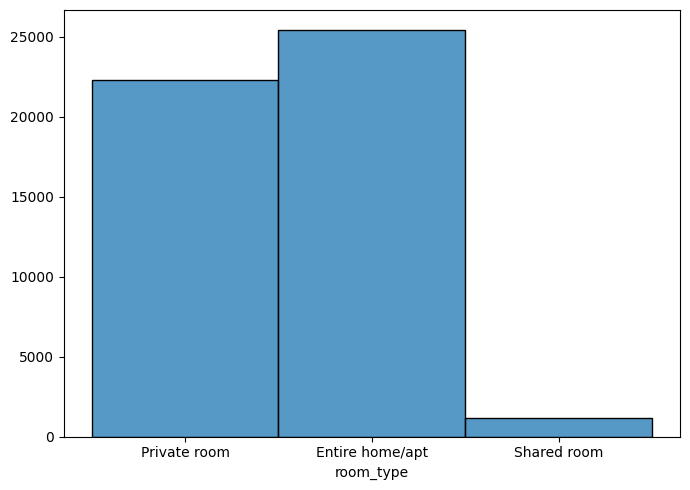

In [ ]:
plt.figure(figsize=(7, 5)) 
sns.histplot( data = ds, x = "room_type").set(ylabel = None)
plt.tight_layout()

plt.show()




Las preferencias a la hora de escoger habitación son claras, o se decanta por un apartamento ( mas de 500 registros) o por habitaciones privadas(sobre 450). A penas hay registros de habitaciones compartidas.

Variables numericas: id, host_id, latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365

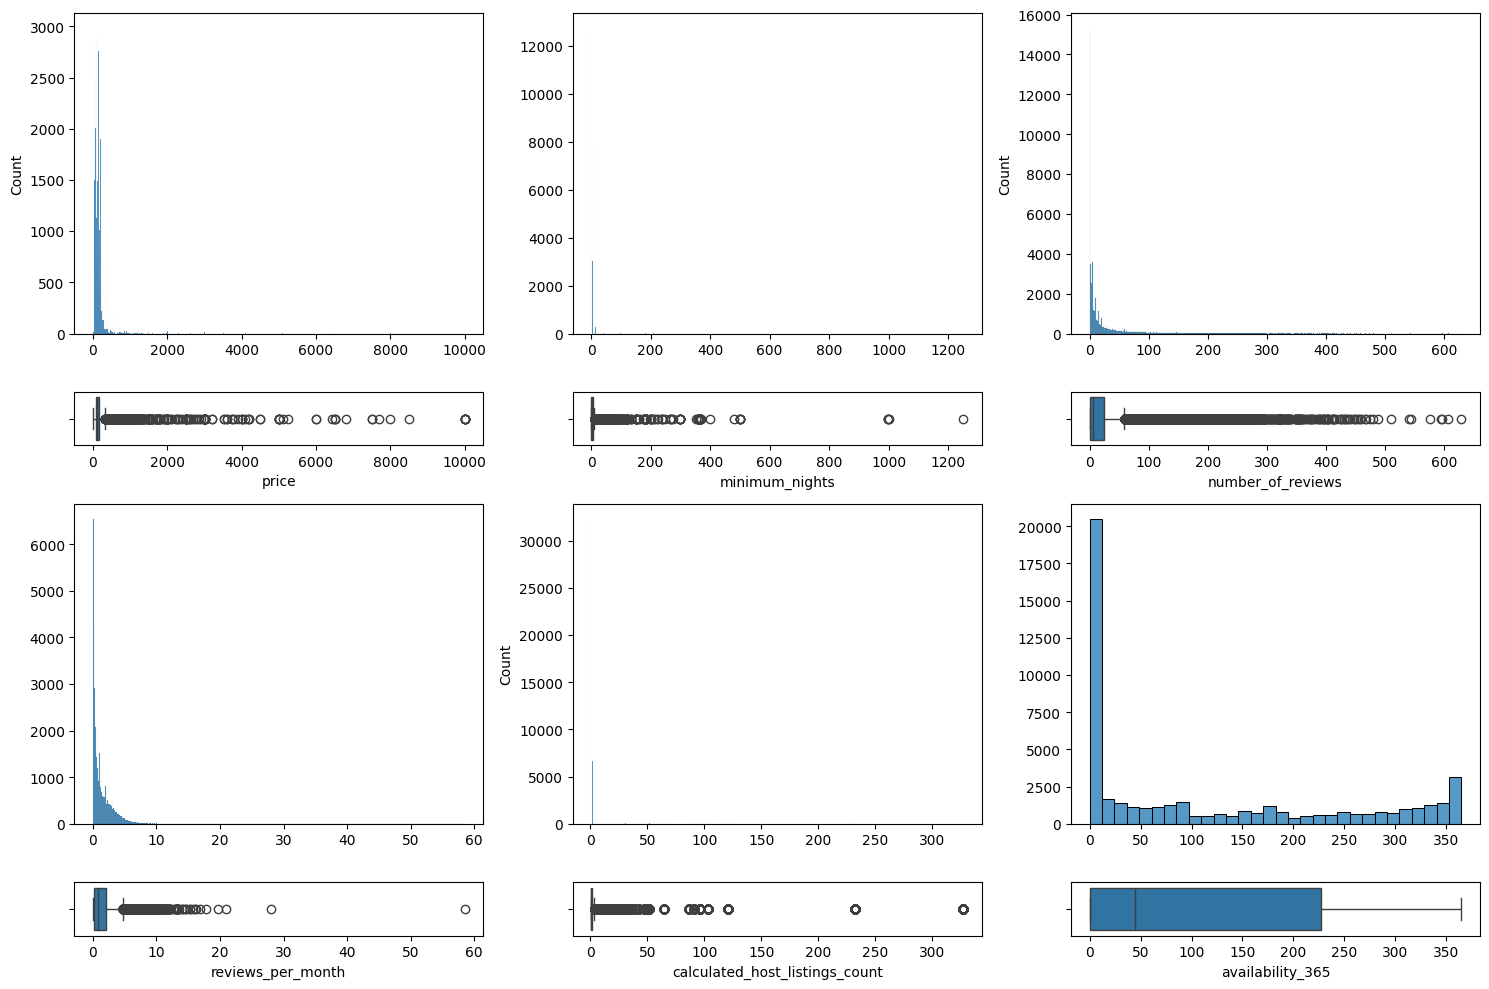

In [ ]:
fig, axis = plt.subplots(4, 3, figsize = (15, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = ds_limpio, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = ds_limpio, x = "price")
sns.histplot(ax = axis[0, 1], data = ds_limpio, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = ds_limpio, x = "minimum_nights")
sns.histplot(ax = axis[0, 2], data = ds_limpio, x = "number_of_reviews").set(xlabel = None)
sns.boxplot(ax = axis[1, 2], data = ds_limpio, x = "number_of_reviews")
sns.histplot(ax = axis[2, 0], data = ds_limpio, x = "reviews_per_month").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = ds_limpio, x = "reviews_per_month")
sns.histplot(ax = axis[2, 1], data = ds_limpio, x = "calculated_host_listings_count").set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = ds_limpio, x = "calculated_host_listings_count")
sns.histplot(ax = axis[2, 2], data = ds_limpio, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 2], data = ds_limpio, x = "availability_365")


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Sorprende la reprende la representación de la disponibilidad, es francamente baja para la mayoría de establecimientos, con medias inferiores a 50 días libres por año. Si bien es cierto que en un número menor de establecimientos si existe una mayor disponibilidad. En el resto de atribituos se aprecian outlayers, siendo en "número de noches" especialmetne significativo,superando las 1000 noches el ciertos casos, lo que indica que o bien los datos son erróneos (habría que revisar) o bien en ciertos casos se emplean como vivienda habitual.

** Análisis de variables multivariante **

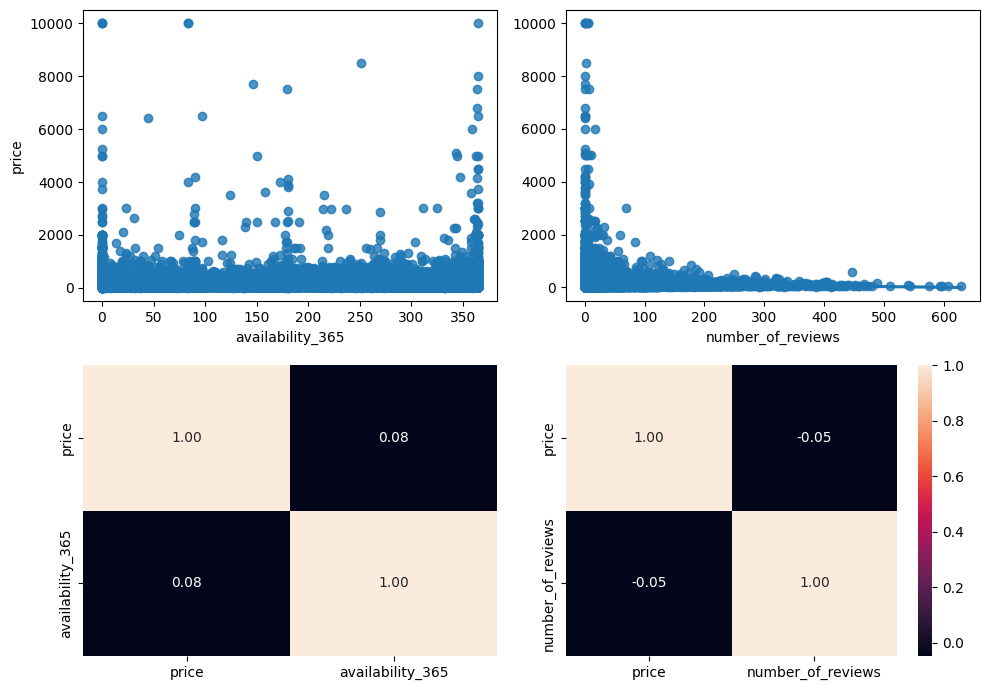

In [ ]:
 # Análisis de variables multivariante
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = ds_limpio, x = "availability_365", y = "price")
sns.heatmap(ds_limpio[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = ds_limpio, x = "number_of_reviews", y = "price").set(ylabel=None)
sns.heatmap(ds_limpio[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

No se aprecia relación de depencia, ni positiva ni negativa entre número de comentarios y disponibilidad con el precio.

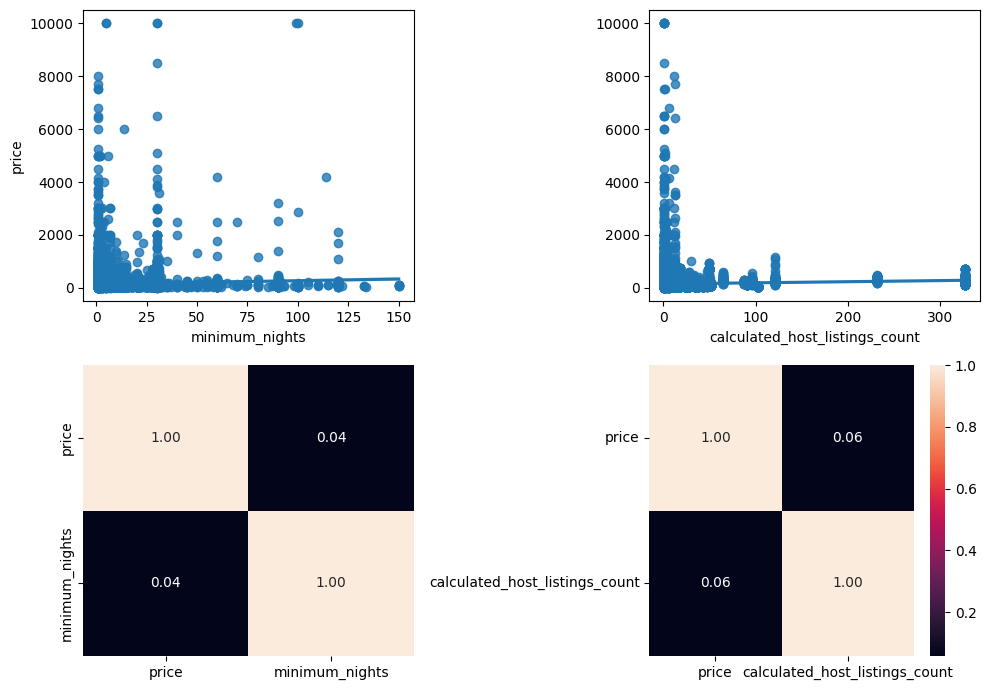

In [17]:
 # Análisis de variables multivariante
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Filtrar los datos donde 'minimum_nights' sea menor o igual a 150 tras ver boxplot
ds_filtrado = ds_limpio[ds_limpio['minimum_nights'] <= 150]

# Crear un gráfico de dispersión con los datos filtrados
sns.regplot(ax=axis[0, 0], data=ds_filtrado, x="minimum_nights", y="price")

sns.heatmap(ds_limpio[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = ds_limpio, x = "calculated_host_listings_count", y = "price").set(ylabel=None)
sns.heatmap(ds_limpio[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

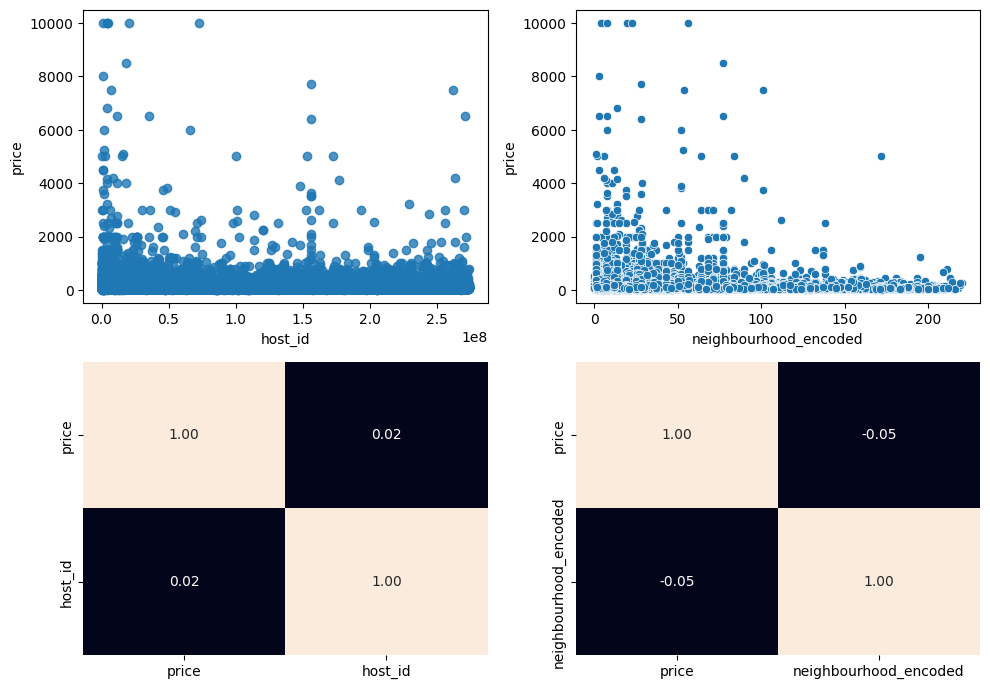

In [ ]:
# Análisis de variables multivariante
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Convertir la columna 'neighbourhood_group' a valores numéricos
ds_limpio['neighbourhood_encoded'] = pd.factorize(ds_limpio['neighbourhood'])[0]

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = ds_limpio, x = "host_id", y = "price")
sns.heatmap(ds_limpio[["price", "host_id"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

# Usar la columna 'neighbourhood_group_encoded' para calcular la correlación
sns.heatmap(ds_limpio[["price", "neighbourhood_encoded"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)


sns.scatterplot(ax=axis[0, 1], data=ds_limpio, x="neighbourhood_encoded", y="price")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


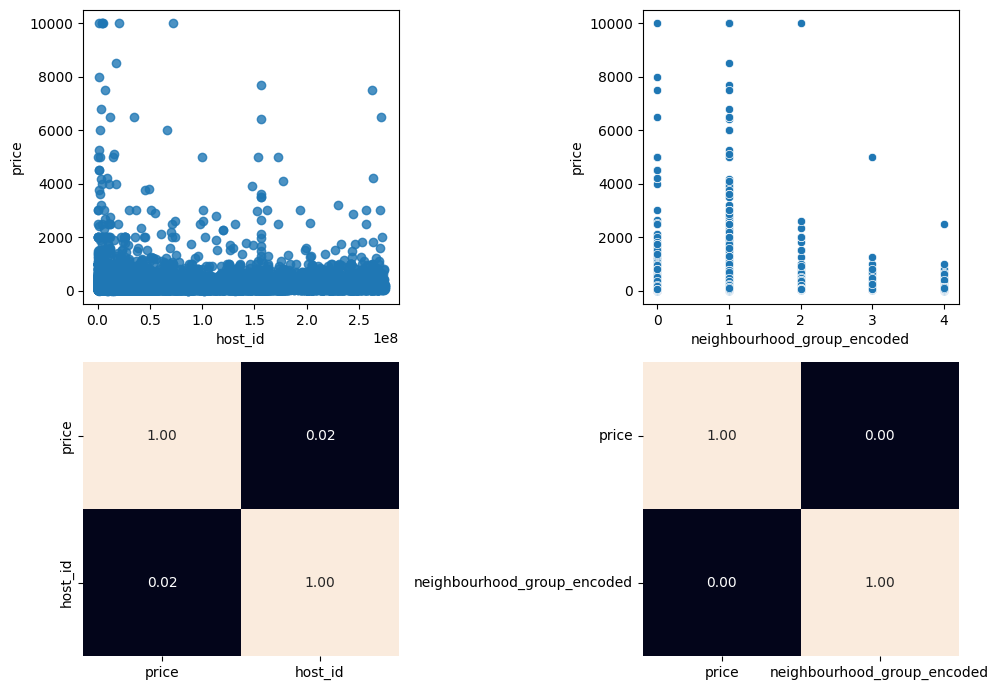

In [ ]:
# Análisis de variables multivariante
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Convertir la columna 'neighbourhood_group' a valores numéricos
ds_limpio['neighbourhood_group_encoded'] = pd.factorize(ds_limpio['neighbourhood_group'])[0]

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = ds_limpio, x = "host_id", y = "price")
sns.heatmap(ds_limpio[["price", "host_id"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

# Usar la columna 'neighbourhood_group_encoded' para calcular la correlación
sns.heatmap(ds_limpio[["price", "neighbourhood_group_encoded"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

# Usar un gráfico de dispersión con la columna 'neighbourhood_group_encoded'
sns.scatterplot(ax=axis[0, 1], data=ds_limpio, x="neighbourhood_group_encoded", y="price")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


  neighbourhood_group  encoded_value
0            Brooklyn              0
1           Manhattan              1
2              Queens              2
3       Staten Island              3
4               Bronx              4

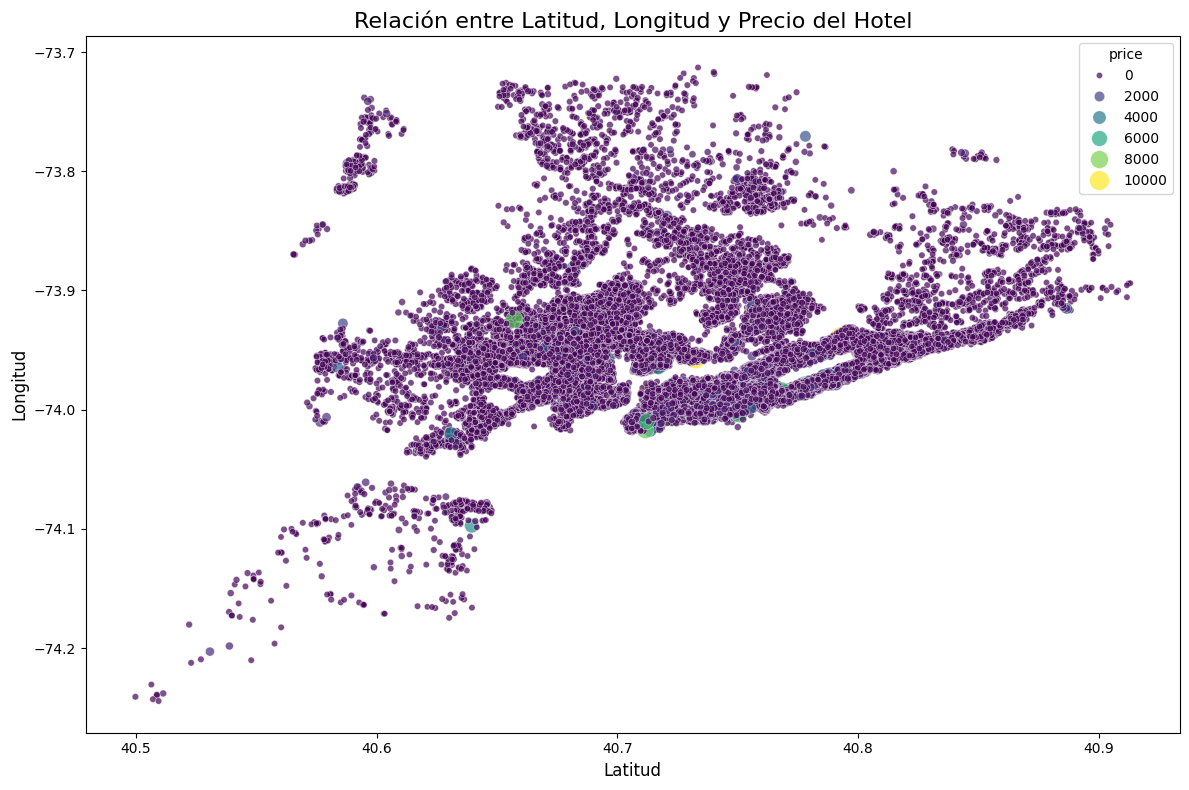

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión con latitud y longitud, donde el color representa el precio
plt.figure(figsize=(12, 8))
sns.scatterplot(data=ds_limpio, x='latitude', y='longitude', hue='price', palette='viridis', size='price', sizes=(20, 200), alpha=0.7)

# Agregar título y etiquetas
plt.title('Relación entre Latitud, Longitud y Precio del Hotel', fontsize=16)
plt.xlabel('Latitud', fontsize=12)
plt.ylabel('Longitud', fontsize=12)

# Ajustar el layout para evitar sobreposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()


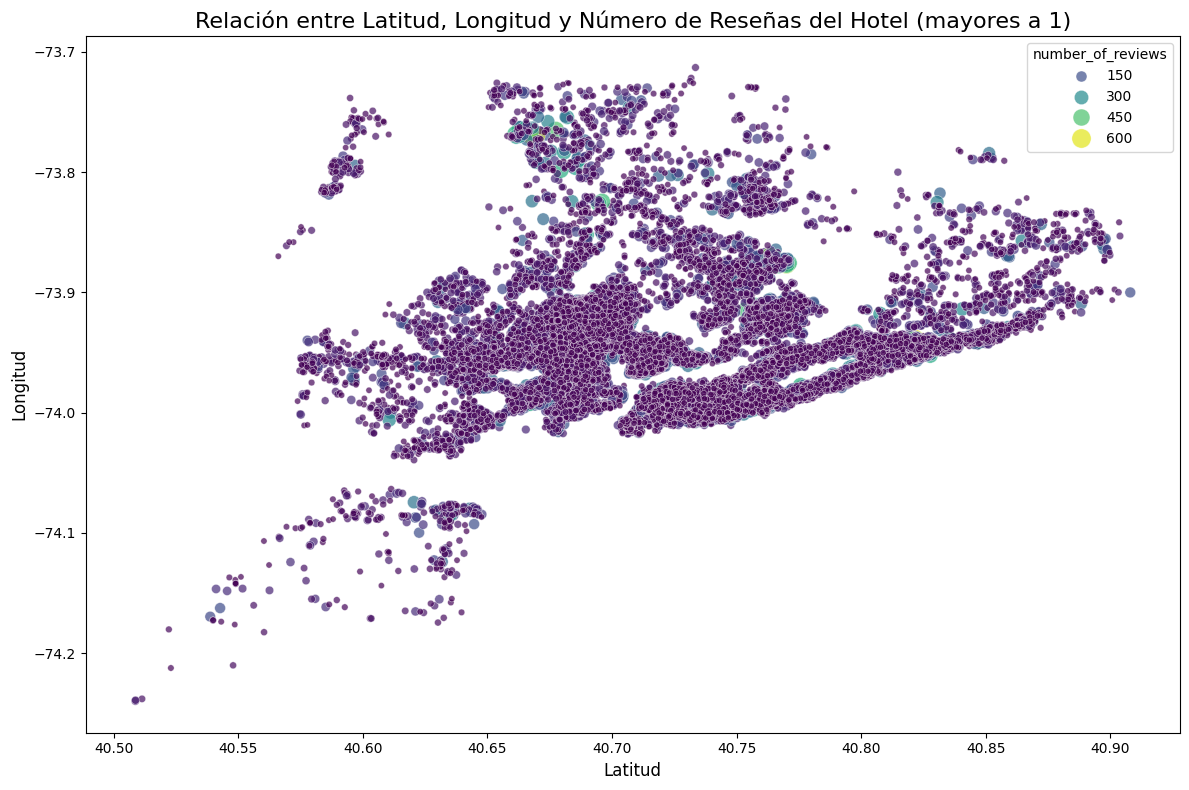

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar filas donde 'number_of_reviews' no es nulo y es mayor a 1
ds_limpio_filtrado = ds_limpio.dropna(subset=['number_of_reviews'])
ds_limpio_filtrado = ds_limpio_filtrado[ds_limpio_filtrado['number_of_reviews'] > 1]

# Crear el gráfico de dispersión con latitud y longitud, donde el color representa el número de reseñas
plt.figure(figsize=(12, 8))
sns.scatterplot(data=ds_limpio_filtrado, x='latitude', y='longitude', hue='number_of_reviews', palette='viridis', size='number_of_reviews', sizes=(20, 200), alpha=0.7)

# Agregar título y etiquetas
plt.title('Relación entre Latitud, Longitud y Número de Reseñas del Hotel (mayores a 1)', fontsize=16)
plt.xlabel('Latitud', fontsize=12)
plt.ylabel('Longitud', fontsize=12)

# Ajustar el layout para evitar sobreposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Análisis categórico-categórico

In [14]:
ds.columns

Index(['id', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

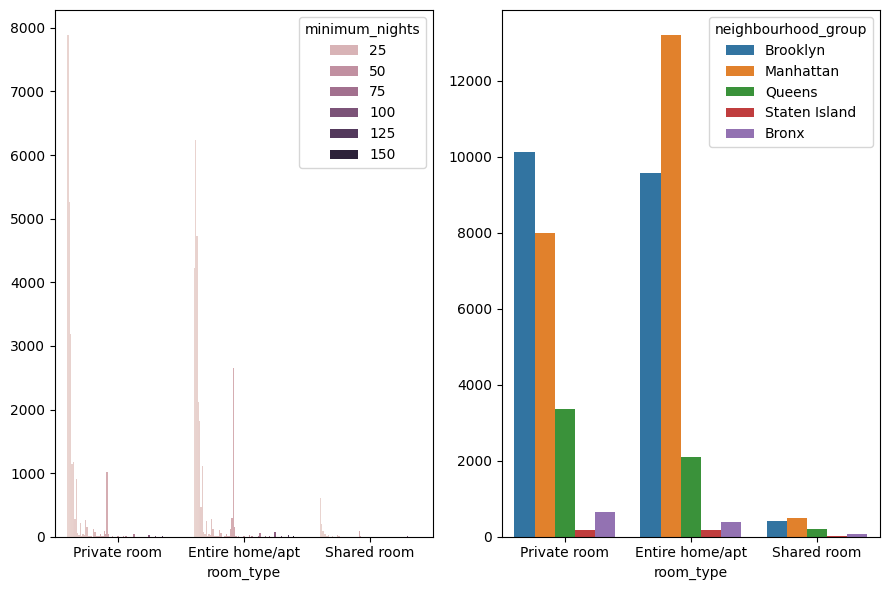

In [34]:
fig, axis = plt.subplots(1, 2, figsize = (9, 6))
# Filtrar los datos donde 'minimum_nights' sea menor o igual a 150 tras ver boxplot
ds_filtrado = ds_limpio[ds_limpio['minimum_nights'] <= 150]

sns.countplot(ax = axis[0], data =ds_filtrado, x =  "room_type" , hue = "minimum_nights").set(ylabel = None)
sns.countplot(ax = axis[1], data =ds_limpio, x = "room_type", hue = "neighbourhood_group").set(ylabel = None)
plt.tight_layout()  
plt.show()


In [35]:
# Contar los valores NaN por columna
nan_count = ds_limpio.isna().sum()

# Mostrar los resultados
print(nan_count)


id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


A la vista de estos valores, habría que eliminas estas columnas, ya que no aportan demasiada info, no ha corelaciones y además hay demasiados valores nulos.

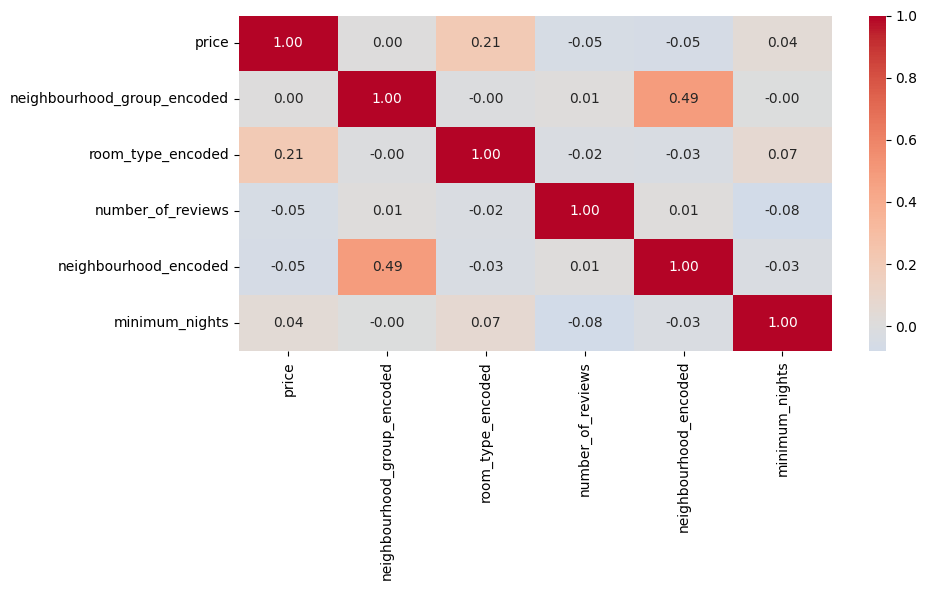

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convertir columnas categóricas en valores numéricos
ds_limpio["neighbourhood_group_encoded"] = pd.factorize(ds_limpio["neighbourhood_group"])[0]
ds_limpio["room_type_encoded"] = pd.factorize(ds_limpio["room_type"])[0]
ds_limpio["neighbourhood_encoded"] = pd.factorize(ds_limpio["neighbourhood"])[0]  # Codificar 'neighbourhood'

# Seleccionar solo las columnas numéricas para el cálculo de la correlación
corr_data = ds_limpio[["price", "neighbourhood_group_encoded", "room_type_encoded", "number_of_reviews", "neighbourhood_encoded", "minimum_nights"]]

# Calcular la matriz de correlación
corr_matrix = corr_data.corr()

# Crear un mapa de calor de la matriz de correlación
fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)

# Ajustar el layout para evitar superposiciones y mostrar el gráfico
plt.tight_layout()
plt.show()
